In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sympy import *
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline 

In [80]:
df = pd.read_csv('mu_pantheon.csv')

In [86]:
df.columns = ['redshift', 'mu', 'error']
z = df.redshift
y = df.mu
yerr = df.error
Omega_m = Symbol('Omega_m')
Omega_m = np.arange(0, 1.0, 0.01)
Omega_m = np.asarray(Omega_m)
H_0 = 70*10**3
c = 3*10**8

In [87]:
z = np.asarray(z)
z = np.insert(z, 0, 0)
y = np.asarray(y)
yerr = np.asarray(yerr)

In [88]:
len(yerr)

1048

In [92]:
y

array([33.25745, 33.3996 , 33.2748 , ..., 45.5511 , 45.5109 , 46.227  ])

In [95]:
chi2 = [];
for i in Omega_m:
    d = (i*(1+z)**3+(1-i))**-0.5
    dlum = integrate.cumtrapz(d, z)
    z_exp = 5*np.log10((c/H_0*(1+z[:-1]))*dlum)+25
    k = (((z_exp - z_obs)**2)/yerr)
    print(np.asarray(np.sum(k, axis = 0, keepdims = True)))

[488.76569377]
[455.67843547]
[425.6215921]
[398.17550934]
[373.03130515]
[349.94809211]
[328.73083055]
[309.2173774]
[291.27026044]
[274.77113149]
[259.61685195]
[245.71662992]
[232.98986558]
[221.36449071]
[210.77566365]
[201.16472623]
[192.47835821]
[184.66788297]
[177.6886914]
[171.49975905]
[166.06323807]
[161.34410964]
[157.30988579]
[153.93035216]
[151.17734458]
[149.02455419]
[147.44735647]
[146.42266074]
[145.92877691]
[145.94529735]
[146.45299141]
[147.43371134]
[148.87030771]
[150.74655346]
[153.04707532]
[155.75729181]
[158.86335703]
[162.35210954]
[166.21102586]
[170.42817796]
[174.99219441]
[179.8922248]
[185.11790702]
[190.65933724]
[196.50704218]
[202.65195356]
[209.08538453]
[215.79900776]
[222.78483524]
[230.03519942]
[237.5427358]
[245.30036667]
[253.30128594]
[261.53894503]
[270.0070397]
[278.69949771]
[287.61046731]
[296.73430639]
[306.06557239]
[315.5990128]
[325.32955618]
[335.25230381]
[345.36252179]
[355.65563355]
[366.12721288]
[376.7729773]
[387.5887818]
[398

In [9]:
b = np.polyfit(Omega_m, chi2, 3)

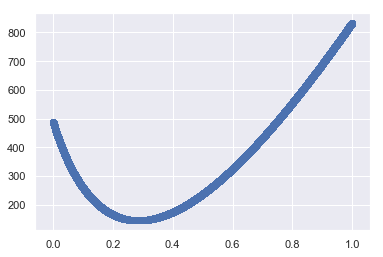

In [10]:
plt.scatter(Omega_m, chi2)

In [11]:
from scipy.optimize import minimize_scalar
from scipy import optimize

In [12]:
x = symbols('x')
def f(x):
    return b[0]*x**3+b[1]*x**2+b[2]*x+b[3]

res = minimize_scalar(f)
res.x

array([0.30854374])

In [13]:
derive = diff(f(x), x)
derive.doit()
#Coef1 = -5102.71532250318
#Coef2 = 8290.97155370599
#Coef3 = -2072.35274056515

[-5102.71532250318*x**2 + 8290.97155370599*x - 2072.35274056515]

In [14]:
coeff = [-5102.71532250318, 8290.97155370599, -2072.35274056515]

In [15]:
np.roots(coeff)

array([1.31627188, 0.30854374])